In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import joblib

In [5]:
# Dataset
data = pd.read_csv("C:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\Algoritma Logistic Regression\Shopee_Sampled_Reviews.csv")
df = pd.DataFrame(data)

print(df.head())

                               reviewId      userName  \
0  61ccddf5-2848-47d6-83a7-434e4e613bfa  Andi Gunawan   
1  affdfdc0-0a10-4353-8ba9-52a669f8a1ba     Sari Sari   
2  f5a73edb-ae1a-4a1b-93a6-aa2a5fe5217e        Laz Ai   
3  0ffb52f7-3611-4fd3-a874-6e3ef6ad4fed    Kuprit Bae   
4  c726e46a-3343-4db0-8733-30e8b42d9f1c   Evans irdas   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ACB-R...   
1  https://play-lh.googleusercontent.com/a/AGNmyx...   
2  https://play-lh.googleusercontent.com/a/AGNmyx...   
3  https://play-lh.googleusercontent.com/a/AGNmyx...   
4  https://play-lh.googleusercontent.com/a-/ACB-R...   

                                             content  score  thumbsUpCount  \
0  Udah sering belanja trs tapi setiap pengajuan ...      1              1   
1            Semenjak di upgrade.. SHOPEE JADI LEMOT      1              0   
2                  Penyelesaian masalah sangat buruk      1              0   
3       

In [6]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2500 non-null   object
 1   userName              2500 non-null   object
 2   userImage             2500 non-null   object
 3   content               2500 non-null   object
 4   score                 2500 non-null   int64 
 5   thumbsUpCount         2500 non-null   int64 
 6   reviewCreatedVersion  1950 non-null   object
 7   at                    2500 non-null   object
 8   replyContent          1628 non-null   object
 9   repliedAt             1628 non-null   object
dtypes: int64(2), object(8)
memory usage: 195.4+ KB
None
reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    550
at                        0
replyContent

In [10]:
# Lihat daftar kolom
print("\nKolom yang tersedia:", data.columns.tolist())


Kolom yang tersedia: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']


In [11]:
# Buat kolom label (1 = positif, 0 = negatif)
data['label'] = data['score'].apply(lambda x: 1 if x >= 4 else 0)

In [12]:
# Cek hasil
print(data[['content', 'score', 'label']].head())

                                              content  score  label
0   Udah sering belanja trs tapi setiap pengajuan ...      1      0
3                                      Apk engga😇 jls      1      0
5                        Fitur lengkap tapi apk berat      1      0
11                             Lemot banget sekarang.      1      0
12  Shopee memang payah,paket sepatu dari Jakarta ...      1      0


In [7]:
data = data.dropna()

In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['content'])
y = data['label']

In [14]:
# Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Buat model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# Prediksi
y_pred = model.predict(X_test)

In [18]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.810077519379845
Confusion Matrix:
 [[128  31]
 [ 18  81]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       159
           1       0.72      0.82      0.77        99

    accuracy                           0.81       258
   macro avg       0.80      0.81      0.80       258
weighted avg       0.82      0.81      0.81       258



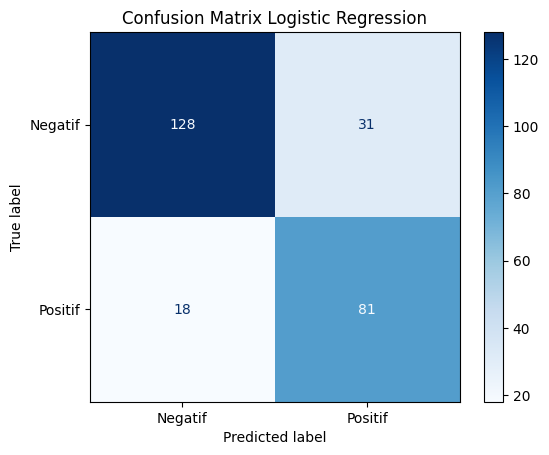

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatif", "Positif"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Logistic Regression")
plt.show()

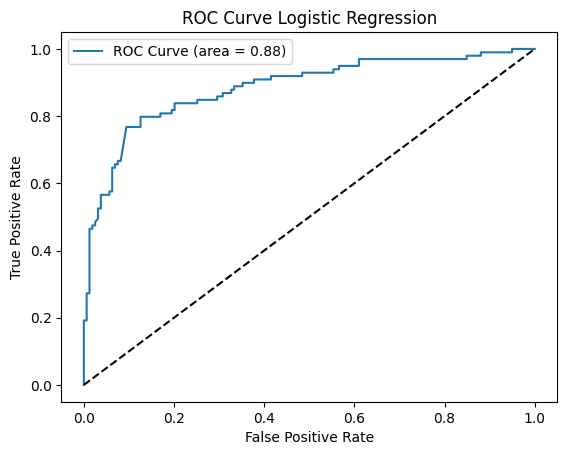

In [27]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # ambil probabilitas kelas positif
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.show()

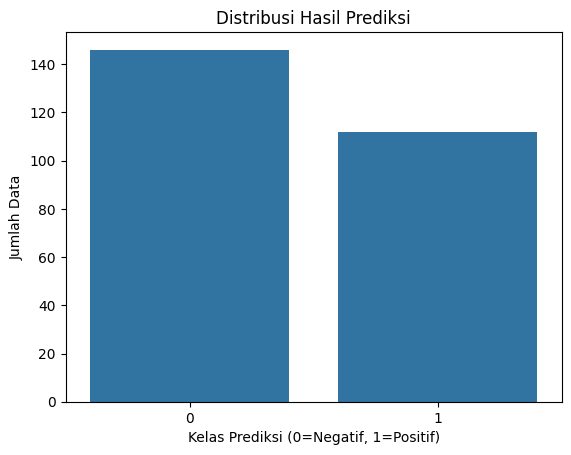

In [28]:
sns.countplot(x=y_pred)
plt.title("Distribusi Hasil Prediksi")
plt.xlabel("Kelas Prediksi (0=Negatif, 1=Positif)")
plt.ylabel("Jumlah Data")
plt.show()

In [33]:
# Simpan model dan vectorizer
joblib.dump(model, "logistic_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model dan vectorizer berhasil disimpan!")

Model dan vectorizer berhasil disimpan!
